In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/malay/OneDrive/Desktop/Projects/Diabetes Prediction/diabetes.csv")
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [3]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [4]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the features and target variable
defeatures = df.drop('diabetes', axis=1)
target = df['diabetes']

# Apply SelectKBest class to extract top 5 best features
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(defeatures, target)

# Get the scores and feature names
scores = fit.scores_
feature_names = defeatures.columns

# Create a dataframe with feature names and scores
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

feature_scores

,Feature,Score
4,insulin,2175.565273
1,glucose_conc,1411.887041
7,age,181.303689
5,bmi,127.669343
0,num_preg,111.519691
3,thickness,53.108040
2,diastolic_bp,17.605373
6,diab_pred,5.392682
8,skin,2.092457


In [6]:
# Merge two features
merged_feature = df['insulin'] * df['glucose_conc']

# Add the merged feature to the dataframe
df['merged_feature'] = merged_feature

df[['insulin', 'glucose_conc', 'merged_feature']].head()

,insulin,glucose_conc,merged_feature
0,0,148,0
1,0,85,0
2,0,183,0
3,94,89,8366
4,168,137,23016


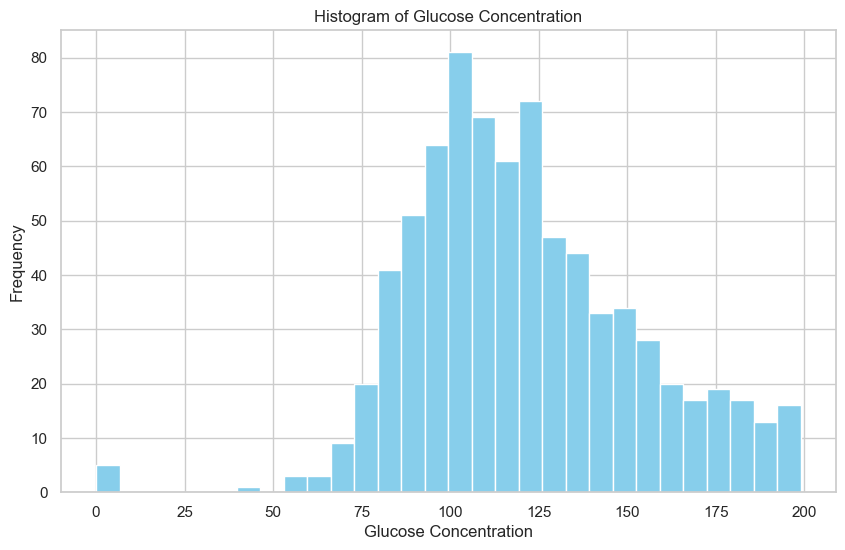

C:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\malay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


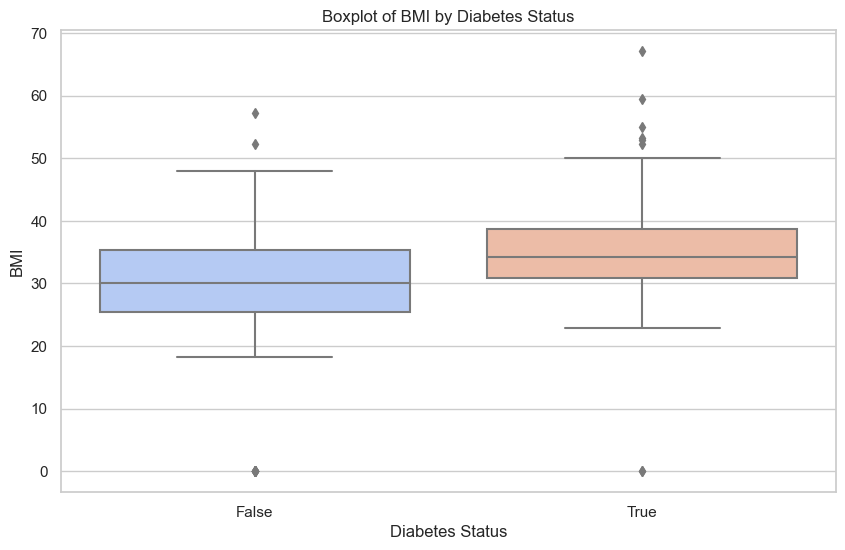

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Histogram of Glucose Concentration
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df['glucose_conc'], bins=30, color='skyblue')
plt.title('Histogram of Glucose Concentration')
plt.xlabel('Glucose Concentration')
plt.ylabel('Frequency')
plt.show()

# Boxplot of BMI
plt.figure(figsize=(10, 6), facecolor='white')
sns.boxplot(x='diabetes', y='bmi', data=df, palette='coolwarm')
plt.title('Boxplot of BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

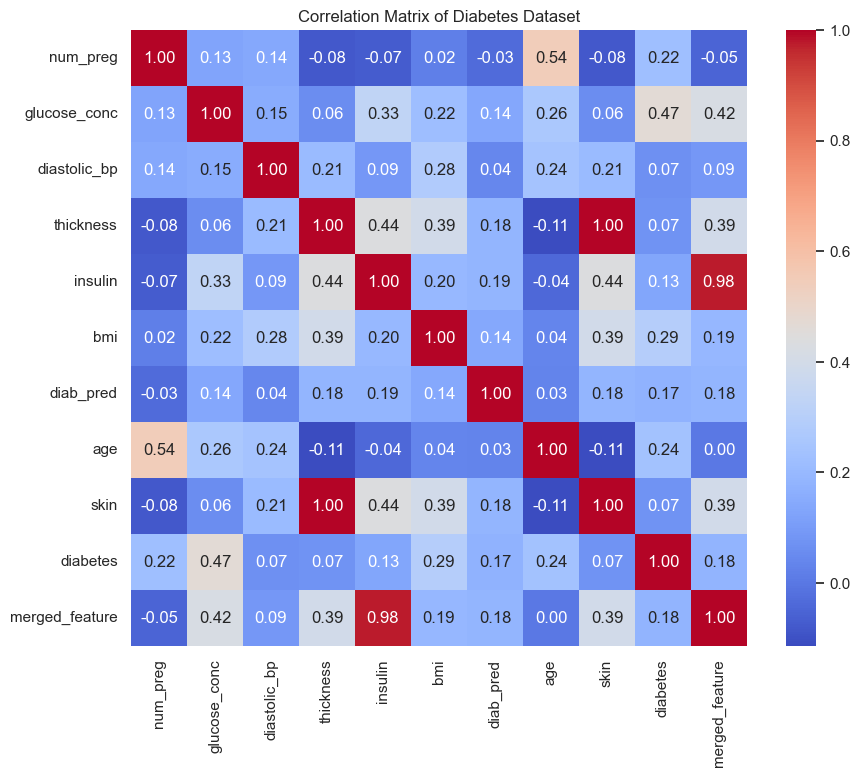

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

tqdm.pandas()

corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Selecting the features and target variable
X = df[['glucose_conc', 'insulin', 'bmi', 'age', 'diab_pred', 'diastolic_bp']]
y = df['diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), X_test.head(), y_train.head(), y_test.head()

(     glucose_conc  insulin   bmi  age  diab_pred  diastolic_bp
 60             84        0   0.0   21      0.304             0
 618           112        0  28.2   50      1.282            82
 346           139       83  28.7   22      0.654            46
 294           161        0  21.9   65      0.254            50
 231           134      370  46.2   46      0.238            80,
      glucose_conc  insulin   bmi  age  diab_pred  diastolic_bp
 668            98      190  34.0   43      0.430            58
 324           112        0  35.7   21      0.148            75
 624           108        0  30.8   21      0.158            64
 690           107        0  24.6   34      0.856            80
 473           136        0  29.9   50      0.210            90,
 60     False
 618     True
 346    False
 294    False
 231     True
 Name: diabetes, dtype: bool,
 668    False
 324    False
 624    False
 690    False
 473    False
 Name: diabetes, dtype: bool)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the features and target variable
features = ['glucose_conc', 'insulin', 'bmi', 'age', 'diab_pred', 'diastolic_bp']
target = 'diabetes'

# Converting 'diabetes' from boolean to int
df['diabetes'] = df['diabetes'].astype(int)

# Splitting the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = model.predict(X_test)

# Calculating the model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.18023822602926465
R^2 Score: 0.2149623932947582


In [13]:
from sklearn.linear_model import LogisticRegression

# Training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred_logistic = logistic_model.predict(X_test)

# Calculating the model accuracy
accuracy = logistic_model.score(X_test, y_test)

accuracy

0.7597402597402597